In [1]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd
from mpl_interactions import ioff, panhandler, zoom_factory

import re


In [2]:
# ddf = dd.read_hdf(os.path.join("../../../../Google Drive/My Drive/Data/ATPC/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
# ddf = dd.read_hdf(os.path.join("../data/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
ddf = dd.read_hdf(os.path.join("../config/", 'ATPC_0nubb_smear.h5'), key = 'hits')
hits = ddf.compute()
display(hits)

event_hits = hits[hits.event_id == 0]

,event_id,x,y,z,energy
0,0,-1939.907593,-141.101166,2740.443848,0.015225
1,0,-1940.700562,-141.490891,2740.653564,0.014700
2,0,-1877.655884,-309.526123,3125.980957,0.008950
3,0,-1881.662476,-309.745789,3126.505371,0.001250
4,0,-1887.794556,-309.323395,3127.444580,0.002775
...,...,...,...,...,...
9447,8,946.259216,-1102.157715,2406.250488,0.002700
9448,8,937.711365,-1098.079224,2407.567627,0.005475
9449,8,943.477905,-1100.691162,2408.453857,0.002150
9450,8,940.764709,-1099.336304,2408.646484,0.000425


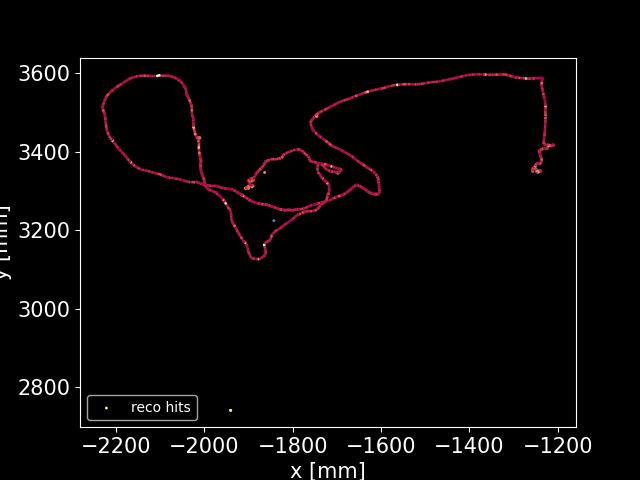

In [6]:

# Make a 3D view of the track
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111)

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
# ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# ax.set_xlim(-2000, -500)
# ax.set_ylim(4000, 5500)
# ax.set_ylim(1500, 3000)

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)

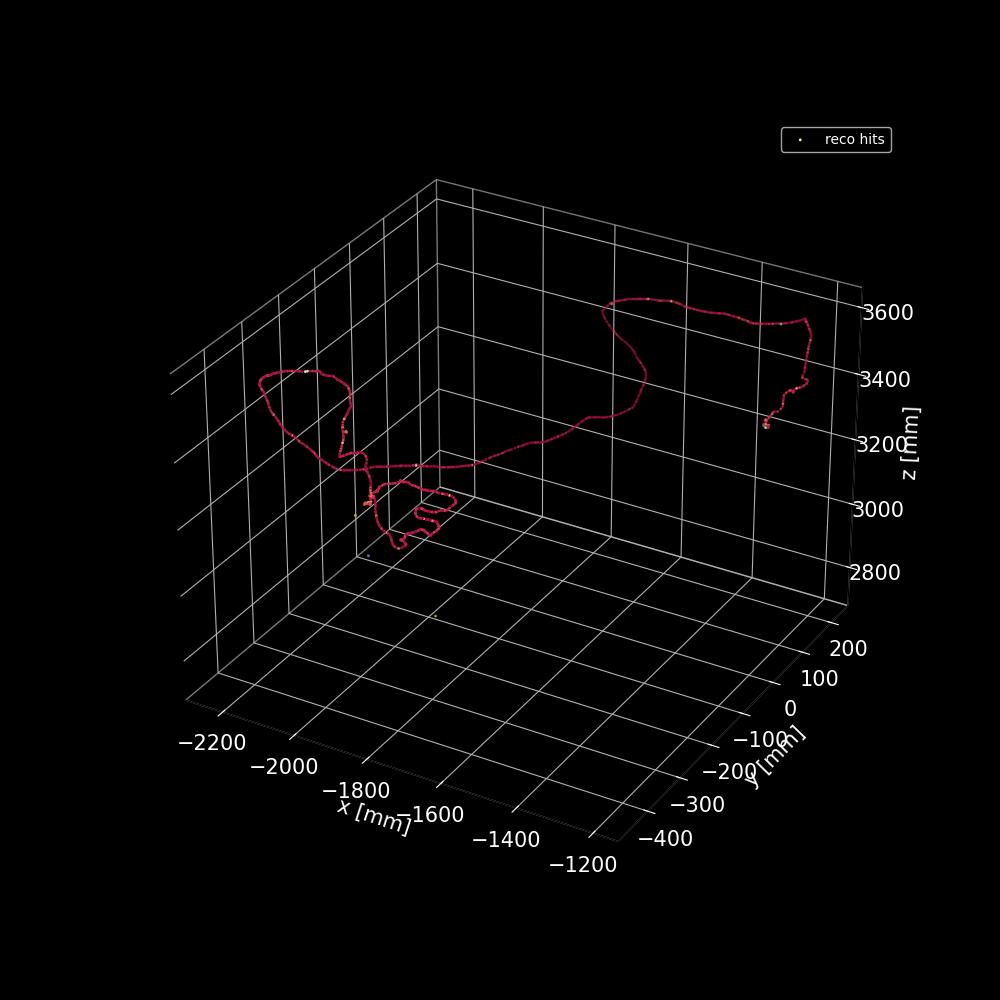

In [4]:
%matplotlib widget



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

In [5]:
# Load in a file from Adam Para and see what it looks like for signal and background

signal = pd.read_csv("../../ML/data/Para/Data/single_electron/mctruehits_trk_1161.dat", sep=' ', header=None, names=["hitid", "x", "y", "z", "energy"])
%matplotlib inline



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111)

# fig.set_facecolor('black')
# ax.set_facecolor('black')
ax.scatter(signal.x, signal.z,c= signal.energy, cmap='Spectral', s=5, label = "true hits")

ax.set_xlabel("x [cm]", fontsize = 15)
ax.set_ylabel("y [cm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# # ax.zaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# ax.set_xlim(-2000, -500)
# ax.set_ylim(3500, 5500)
# ax.set_ylim(1500, 3000)

legend = plt.legend()

# Set the text color of the legend
# for text in legend.get_texts():
#     text.set_color('white')  # Set the text color to red

plt.title("Bkg")

display(signal)

FileNotFoundError: [Errno 2] No such file or directory: '../../ML/data/Para/Data/single_electron/mctruehits_trk_1161.dat'